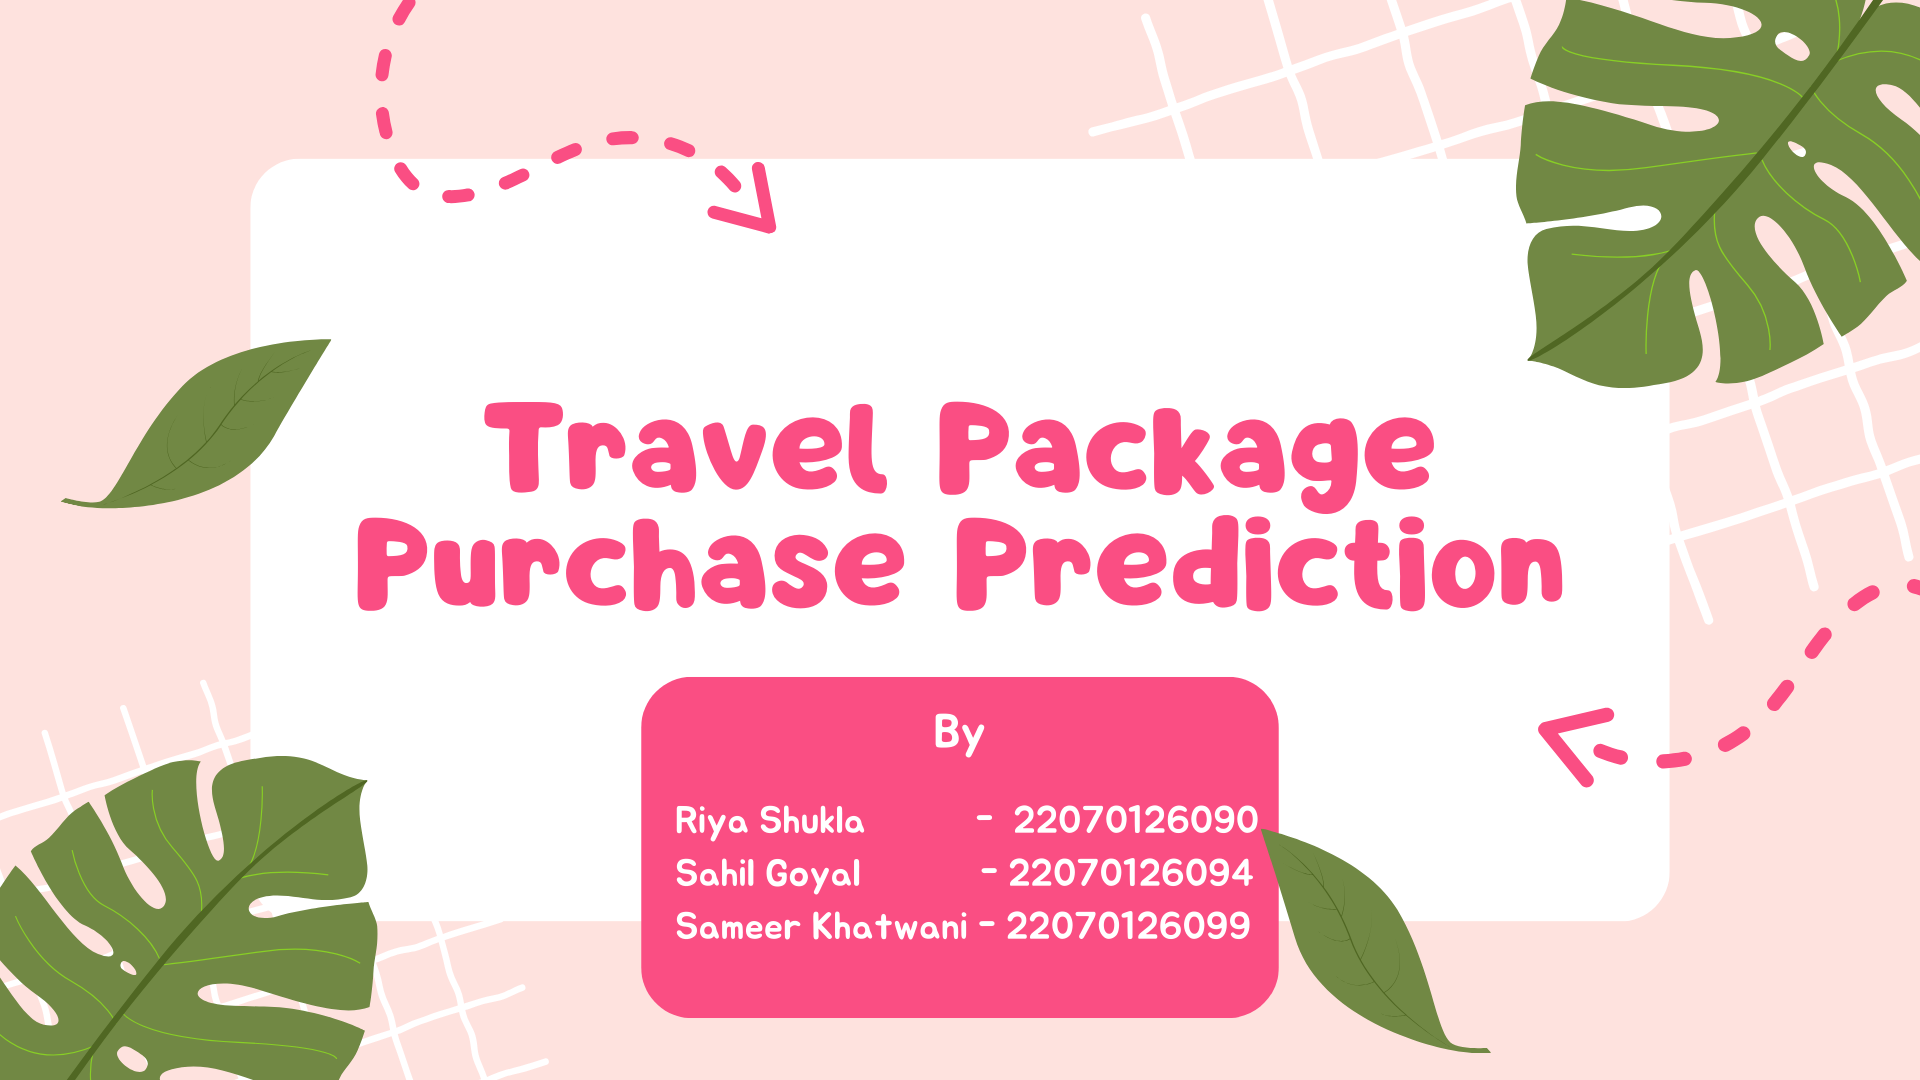

# **Data Description**
* CustomerID : Unique customer ID
* ProdTaken : Product taken or not (0: No, 1: Yes)
* Age : Age of customer
* TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
* CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
* DurationOfPitch : Duration of the pitch by a salesperson to the customer
* Occupation : Occupation of customer
* Gender : Gender of customer
* NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
* NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
* ProductPitched: Product pitched by the salesperson
* PreferredPropertyStar : Preferred hotel property rating by customer
* MaritalStatus : Marital status of customer
* NumberOfTrips : Average number of trips in a year by customer
* Passport : The customer has a passport or not (0: No, 1: Yes)
* PitchSatisfactionScore : Sales pitch satisfaction score
* OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting : Total number of children with age less than 5
* planning to take the trip with the customer
* Designation : Designation of the customer in the current organization
* MonthlyIncome : Gross monthly income of the customer

# Introduction

## Importing all the Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import  r2_score

# **Redaing and Understanding the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the dataset.
df_travel= pd.read_csv('/content/drive/MyDrive/Tourismfe.csv')

# Creating a copy of the dataset.
df=df_travel.copy()

# Viewing the first five rows of the dataset.
df.head()

,CustomerID,ProdTaken,Age,Company Invited,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,1,Self Enquiry
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,Company Invited
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,1,Self Enquiry
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,Company Invited
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,Self Enquiry


## Understanding The Dataset

In [ ]:
#get the size of dataframe
print ("Rows     : " , df.shape[0])  # number of rows/observations
print ("Columns  : " , df.shape[1]) # number of columns
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #For the name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2).sort_values(ascending=False)) # looking at columns with most Missing Values

Rows     :  4888
Columns  :  22
######################################## 
 Features : 

 ['CustomerID', 'ProdTaken', 'Age', 'Company Invited', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance', 'TypeofContact']
######################################## 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Company Invited              25
NumberOfPersonVisiting        0
Gender                        0
ProductPitched                0
ProdTaken                     0
MaritalStatus                 0
Occupation                    0

* Age column has 4.62% missing values out of the total observations.
* TypeofContact column has 0.51% missing values out of the total observations.
* DurationOfPitch column has 5.14% missing values out of the total observations.
* NumberOfFollowups column has 0.92% missing values out of the total observations.
* PreferredPropertyStar column has 0.53% missing values out of the total observations.
* NumberOfTrips column has 2.86% missing values out of the total observations.
* NumberOfChildrenVisiting column has 1.35% missing values out of the total observations.
* MonthlyIncome column has 4.77% missing values out of the total observations.

## Addition of a New Column Budget in the Dataframe

# Remove Company Invited as CompanyInvited and TypeOfContact are same

In [ ]:
# Dropping the column of company invited.
del df['Company Invited']

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance',
       'TypeofContact'],
      dtype='object')

## Data Type of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

* There are total 21 columns and 4,888 observations in the dataset.
* We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values

## Descriptive Statistics

In [ ]:
# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


These inferences provide a summary of the central tendency, variability, and range of the data for each variable .



*   Minimum age of customer is 18 and Maximum age is 61 with mean 38 and median 36.
*   Mean Duration of pitch is 15 mins to max of 127 mins.

*   Mean Number of trips is 3 with maximum of 22.
*   Average monthly income of customer is 23619 with maximum of 98678.






In [ ]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842
TypeofContact,4863,2,Self Enquiry,3444




*   Salaried appears 2,368 times in the dataset, maximum customers were salaried.
*   "Male" appears 2,916 times in the dataset, male is the most frequent gender

*    "Basic" is pitched 1,842 times, making it the most frequently pitched product.


*   "Self Enquiry" is the type of contact for 3,444 entries as a result of which it was









In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,insurance
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000,4888.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491,0.423486
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361,0.494161
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000,0.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000,0.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000,1.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


Observations

* **Minimum age** of customer is 18 and Maximum age is 61 with mean of 38.
* **Mean Duration of pitch** is **15 mins** to **max of 127 mins**.
* **Mean Number of trips is 3** with **maximum of 22**.This needs to be verified
* **Average annual income** of customer is **1,150,532** with maximum of 4,200,000.
* 920 customer had taken package last time.








# **Data Pre-processing**

## Analysing Null Values

In [ ]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
insurance                     0
TypeofContact                25
dtype: int64

In [ ]:
cat_cols=['ProdTaken','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
------------------------------
Married      2340
Divorc

Observation :


*   gender distribution has an error , as it is considering Fe male as unique value.
*   In marital status single and unmarried both are same.



**Unique values in each column**

In [ ]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
insurance                      2
TypeofContact                  2
dtype: int64

Observation :

* Most of the variables are categorical except - Age, duration of pitch, monthly income and number of trips of customers.

**Rectification in Gender**

In [ ]:
df["Gender"] = df["Gender"].str.replace("Fe Male","Female")
print(df["Gender"].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


**Rectification for Marital status**

In [ ]:
df["MaritalStatus"] = df["MaritalStatus"].str.replace("Unmarried","Single")
print(df["MaritalStatus"].value_counts())

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


Observation :


*   Corrections made in Gender and MaritalStatus .




**So, we have have 7 columns which has null values in it.**

In [ ]:
cat_cols = ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance']

Check For Unique Values in Each Column

In [ ]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in CustomerID are :
200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: CustomerID, Length: 4888, dtype: int64
**************************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in Age are :
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
*************************

## Imputation for Null Values

### **Target 1** : AGE

**Imputing missing values with average age of the customers.**

In [ ]:
mean_age=df['Age'].mean()
mean_age

37.62226512226512

In [ ]:
#Round off the age as, the age cannot be a floating number.
round_age=np.round(mean_age)
round_age

38.0

In [ ]:
#Imputing missing values of Age variable with round  of mean age value.
df['Age']=df['Age'].fillna(round_age)
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact
0,200000,1,41.0,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Single,1.0,1,2,1,0.0,Manager,20993.0,1,Self Enquiry
1,200001,0,49.0,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,Company Invited
2,200002,1,37.0,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Single,7.0,1,3,0,0.0,Executive,17090.0,1,Self Enquiry
3,200003,0,33.0,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,Company Invited
4,200004,0,38.0,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,Self Enquiry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,Small Business,Male,3,5.0,Deluxe,...,Single,2.0,1,1,1,1.0,Manager,26576.0,1,Self Enquiry
4884,204884,1,28.0,1,31.0,Salaried,Male,4,5.0,Basic,...,Single,3.0,1,3,1,2.0,Executive,21212.0,1,Company Invited
4885,204885,1,52.0,3,17.0,Salaried,Female,4,4.0,Standard,...,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1,Self Enquiry
4886,204886,1,19.0,3,16.0,Small Business,Male,3,4.0,Basic,...,Single,3.0,0,5,0,2.0,Executive,20289.0,1,Self Enquiry


In [ ]:
# Check for missing values
df['Age'].isna().sum()

0

### **Target 2** : Number of Children Visiting

***Logic*** : *Sorting the dataset with respect to Maritial Status and then Imputing the Number of Children Visiting using KNN*

In [ ]:
# Checking whether the number of Children visiting is 0 if the marital status is single
df[['NumberOfChildrenVisiting','MaritalStatus']][df['MaritalStatus']=='Single'].value_counts()

NumberOfChildrenVisiting  MaritalStatus
1.0                       Single           693
2.0                       Single           431
0.0                       Single           358
3.0                       Single            96
dtype: int64

In [ ]:
df = df.sort_values(by=['MaritalStatus'])

In [ ]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [ ]:
#label encoding on MaritalStatus
#label = LabelEncoder()
#df['MaritalStatus'] = label.fit_transform(df['MaritalStatus'])
#df.head()


In [ ]:
#df['MaritalStatus'].unique()


Label Encoding for MaritalStatus .
*   0 = divorced
*   1 = married

*   2 = single /unmarried





In [ ]:
df['MaritalStatus']

3497    Divorced
3431    Divorced
3433    Divorced
3434    Divorced
3435    Divorced
          ...   
2458      Single
2463      Single
2465      Single
2467      Single
4887      Single
Name: MaritalStatus, Length: 4888, dtype: object

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df['NumberOfChildrenVisiting'] = imputer.fit_transform(df[['NumberOfChildrenVisiting']])

In [ ]:
df['NumberOfChildrenVisiting'].isnull().sum()

0

Again , we sorted the data using index values .

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact
0,200000,1,41.0,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Single,1.0,1,2,1,0.0,Manager,20993.0,1,Self Enquiry
1,200001,0,49.0,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,Company Invited
2,200002,1,37.0,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Single,7.0,1,3,0,0.0,Executive,17090.0,1,Self Enquiry
3,200003,0,33.0,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,Company Invited
4,200004,0,38.0,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,Self Enquiry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,Small Business,Male,3,5.0,Deluxe,...,Single,2.0,1,1,1,1.0,Manager,26576.0,1,Self Enquiry
4884,204884,1,28.0,1,31.0,Salaried,Male,4,5.0,Basic,...,Single,3.0,1,3,1,2.0,Executive,21212.0,1,Company Invited
4885,204885,1,52.0,3,17.0,Salaried,Female,4,4.0,Standard,...,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1,Self Enquiry
4886,204886,1,19.0,3,16.0,Small Business,Male,3,4.0,Basic,...,Single,3.0,0,5,0,2.0,Executive,20289.0,1,Self Enquiry


### **Target 3** : NumberOfTrips





***LOGIC*** :

If the Product Taken is 0, we can conclude that the Number of trips will also be 0, because the customer didnt take the product from the company in the past , then how he will be going for trips.

In [ ]:
df['NumberOfTrips'][df['ProdTaken']==0].isna().sum()

128

In [ ]:
df['NumberOfTrips'][df['ProdTaken']==0] = df['NumberOfTrips'][df['ProdTaken']==0].fillna(0)

<ipython-input-36-e9c1003d37ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberOfTrips'][df['ProdTaken']==0] = df['NumberOfTrips'][df['ProdTaken']==0].fillna(0)


In [ ]:
df['NumberOfTrips'].isna().sum()

12

According to the above logic we were able to impute most of the missing values and now only 12 data points are left behind as null values. So, here we use median to fill the null values

In [ ]:
# Using median to fill the remaining 12 values
d = df['NumberOfTrips'].value_counts().to_dict()
d_array = np.array(list(d))
med = np.median(d_array)

df['NumberOfTrips'].fillna(med,inplace=True)

In [ ]:
df['NumberOfTrips'].isna().sum()

0

### **Target 4** : Type Of Contact


***LOGIC*** : Filling the Null values with MODE or Mostly occuring value

In [ ]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [ ]:
df['TypeofContact'].fillna('Self Enquiry',inplace=True)

**Still Left With !!**

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
insurance                     0
TypeofContact                 0
dtype: int64

### **Target 5** : Monthly Income

***Logic*** : Mapping the relationship between Monthly Income and Designation of the Customer and filling the null values with respect to it.

In [ ]:
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

As Numpy (np.median) accepts only numpy array so, we we will convert it to dictionary then to list then to array and then median.

In [ ]:
d_list = df['Designation'].value_counts().to_dict().keys()
for x in list(d_list):
  null_v = df['MonthlyIncome'][df['Designation']==x].isna().sum()
  print(f"Null Value of {x} : {null_v} ")

Null Value of Executive : 87 
Null Value of Manager : 146 
Null Value of Senior Manager : 0 
Null Value of AVP : 0 
Null Value of VP : 0 


Here we were able to find out that only **"Executive"** and **"Manager"** have Null Values.

Filling the Null values with Mean with respect to the Designation

* Executive

In [ ]:
executive_mean = df['MonthlyIncome'][df['Designation']=='Executive'].mean().round()
executive_mean

19940.0

In [ ]:
df['MonthlyIncome'][df['Designation']=='Executive'] = df['MonthlyIncome'][df['Designation']=='Executive'].fillna(executive_mean)

<ipython-input-46-299b9d0ae723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthlyIncome'][df['Designation']=='Executive'] = df['MonthlyIncome'][df['Designation']=='Executive'].fillna(executive_mean)


* For Manager

In [ ]:
manager_mean = df['MonthlyIncome'][df['Designation']=='Manager'].mean().round()
manager_mean

22643.0

In [ ]:
df['MonthlyIncome'][df['Designation']=='Manager'] = df['MonthlyIncome'][df['Designation']=='Manager'].fillna(manager_mean)

<ipython-input-48-e81a66aacfe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthlyIncome'][df['Designation']=='Manager'] = df['MonthlyIncome'][df['Designation']=='Manager'].fillna(manager_mean)


In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
dtype: int64

Note : After Imputing the null values for Monthly income, we also added a new column called "BUDGET"


**LOGIC** :   **50/30/20 rule**

What is that rule ?
ule helps individuals allocate their income in a balanced way.

50% for needs:  This category includes essential expenses such as housing, utilities, groceries, transportation, and other necessary bills.

**30% for wants:** This category covers discretionary spending on non-essential items such as entertainment, dining out, vacations, and hobbies.

**20% for savings and debt repayment:** This category is dedicated to saving for financial goals, such as emergencies like situation.


In [ ]:
df['Budget']= df['MonthlyIncome'] * 0.3

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
Budget                        0
dtype: int64

### **Target 6** : Preferred Property Star


***LOGIC*** :  Filling the null values of Preferred Property Star with respect to the Mean of respective Designation

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='Executive'].value_counts()


3.0    1118
4.0     368
5.0     355
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='Manager'].value_counts()

3.0    1090
5.0     329
4.0     312
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='Senior Manager'].value_counts()

3.0    436
5.0    175
4.0    130
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='AVP'].value_counts()

3.0    212
5.0     68
4.0     62
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='VP'].value_counts()

3.0    137
4.0     41
5.0     29
Name: PreferredPropertyStar, dtype: int64

Here, it is found that, people of all designation preferred 3.0 star. So, we impute the Null value with 3.0


In [ ]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
Budget                        0
dtype: int64

### **Target 7** : Number of Followups

***Logic*** : Number of Followups is imputed with respect to the Product Pitched column

In [ ]:
df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='King'].isna().sum()

0

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Super Deluxe'].isna().sum()

0

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Standard'].isna().sum()

0

Only null values were found where the product pitched were Deluxe and Basic.

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Deluxe'].isna().sum()

32

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Deluxe'].value_counts()

4.0    724
3.0    509
5.0    263
2.0     86
1.0     65
6.0     53
Name: NumberOfFollowups, dtype: int64

Here, it is clearly know that when the product pitched is deluxe the null value occurs, so we imputed it with mean value of "Deluxe"

In [ ]:
dict1 = df['NumberOfFollowups'][df['ProductPitched']=='Deluxe'].mean().round()
dict1

4.0

For Basic

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Basic'].isna().sum()

13

Similarly, we impute the null values of Number of followups when the product pitched is basic with the mean value of it.

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Basic'].value_counts()

4.0    767
3.0    556
5.0    288
2.0     92
1.0     72
6.0     54
Name: NumberOfFollowups, dtype: int64

In [ ]:
dict1 = df['NumberOfFollowups'][df['ProductPitched']=='Basic'].mean().round()
dict1

4.0

Fillna for both deluxe as well as Basic

In [ ]:

df['NumberOfFollowups'].fillna(4,inplace=True)

In [ ]:
df['NumberOfFollowups'].isna().sum()

0

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
Budget                        0
dtype: int64

###**Target 8**: DurationOfPitch

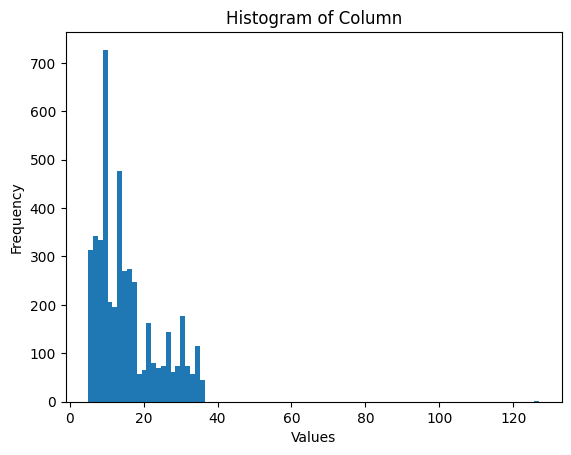

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['DurationOfPitch'], bins='auto')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()


The graph was positively skewed ,So we sorted the product pitched column and the applied KNN imputation on it .

In [ ]:
df.sort_values(by=['ProductPitched'],inplace=True)
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,Basic,...,2.0,1,3,1,1.000000,Executive,20363.0,1,Self Enquiry,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,Basic,...,3.0,1,4,0,1.000000,Executive,21361.0,1,Self Enquiry,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,Basic,...,3.0,0,2,1,1.000000,Executive,20692.0,0,Self Enquiry,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,Basic,...,2.0,1,2,1,1.000000,Executive,98678.0,0,Self Enquiry,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,Basic,...,3.0,0,4,0,1.000000,Executive,20629.0,0,Self Enquiry,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,Super Deluxe,...,2.0,1,5,1,2.000000,AVP,32436.0,1,Company Invited,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,Super Deluxe,...,2.0,0,3,1,1.000000,AVP,31890.0,1,Company Invited,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,Super Deluxe,...,6.0,1,1,0,1.000000,AVP,31643.0,1,Company Invited,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,Super Deluxe,...,4.0,0,5,1,1.187267,AVP,35233.0,1,Self Enquiry,10569.9


As tha Duration of pitch was not normally distributed so mean imputation not favourable.

**KNN - Imputation**

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df['DurationOfPitch'] = imputer.fit_transform(df[['DurationOfPitch']])

In [ ]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
insurance                   0
TypeofContact               0
Budget                      0
dtype: int64

In [ ]:
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,Basic,...,2.0,1,3,1,1.000000,Executive,20363.0,1,Self Enquiry,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,Basic,...,3.0,1,4,0,1.000000,Executive,21361.0,1,Self Enquiry,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,Basic,...,3.0,0,2,1,1.000000,Executive,20692.0,0,Self Enquiry,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,Basic,...,2.0,1,2,1,1.000000,Executive,98678.0,0,Self Enquiry,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,Basic,...,3.0,0,4,0,1.000000,Executive,20629.0,0,Self Enquiry,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,Super Deluxe,...,2.0,1,5,1,2.000000,AVP,32436.0,1,Company Invited,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,Super Deluxe,...,2.0,0,3,1,1.000000,AVP,31890.0,1,Company Invited,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,Super Deluxe,...,6.0,1,1,0,1.000000,AVP,31643.0,1,Company Invited,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,Super Deluxe,...,4.0,0,5,1,1.187267,AVP,35233.0,1,Self Enquiry,10569.9


In [ ]:
df.to_csv('file1.csv')

#**Visualization of the Dataset**

## Distribution of the Data

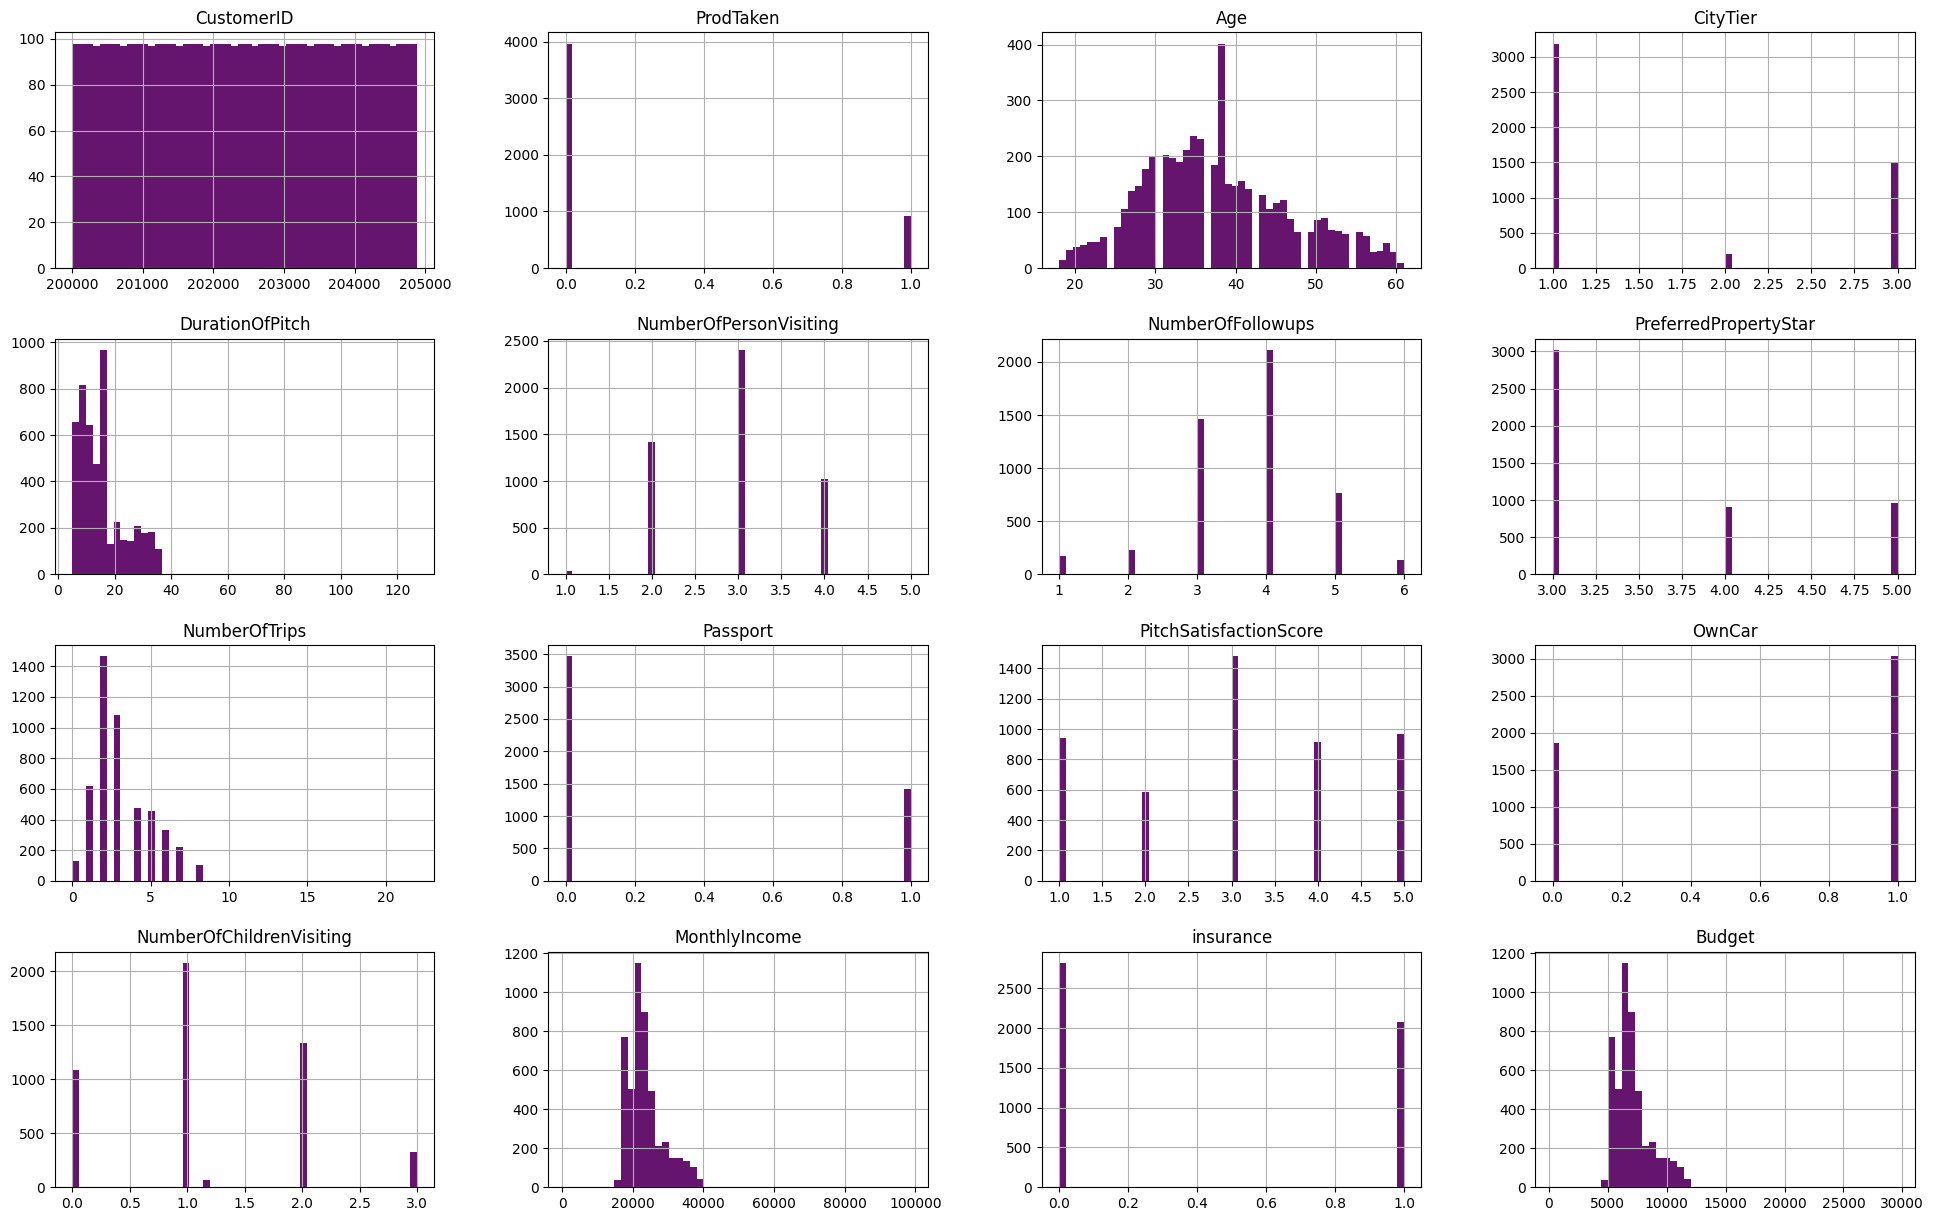

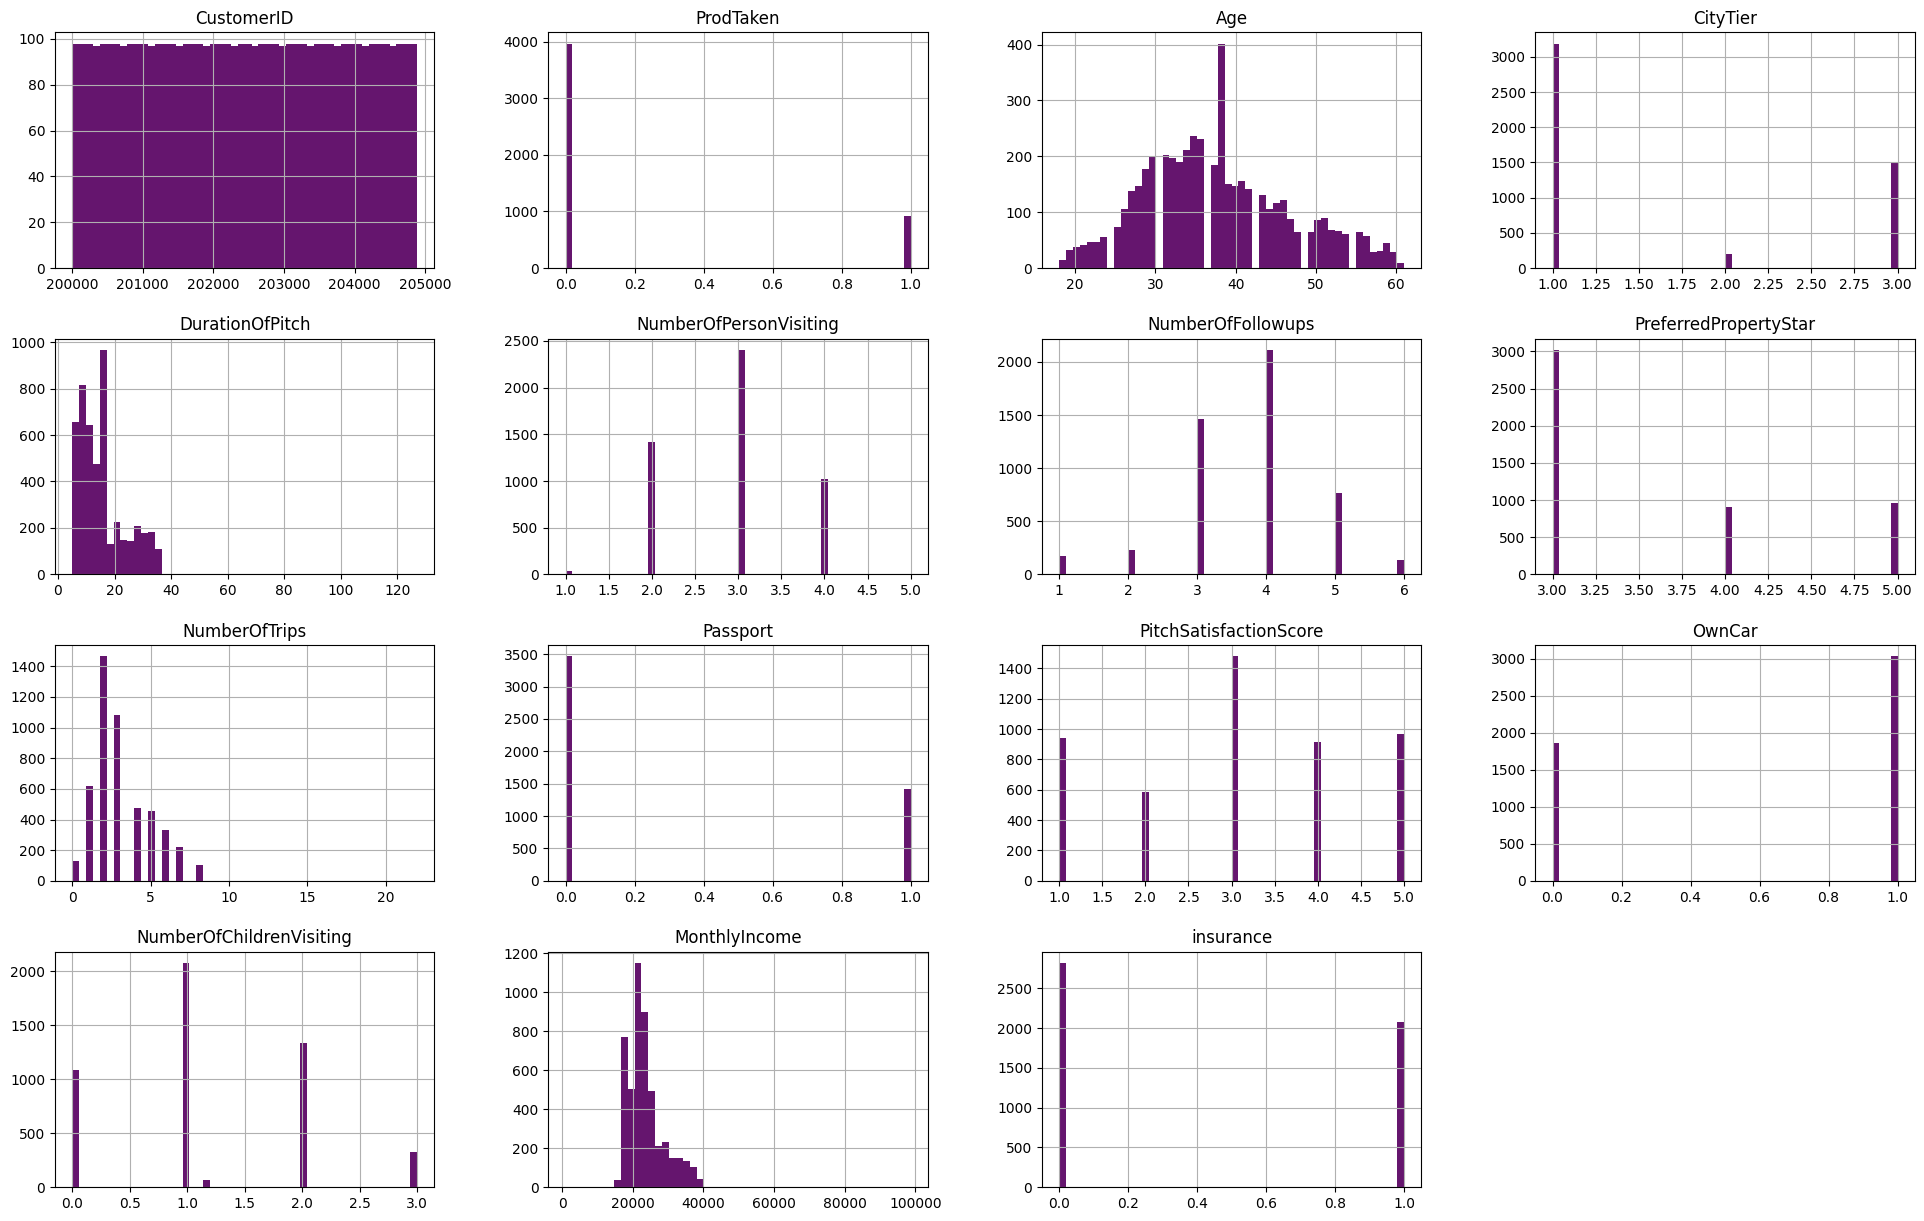

In [ ]:
#Plot the distribution of all numerical columns of the dataframe.
df.hist(bins=50, figsize=(24, 15), color=sns.color_palette("inferno")[1]);
df.loc[:, ['CustomerID', 'ProdTaken', 'Age', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'insurance',]].hist(bins=50, figsize=(24, 15), color=sns.color_palette("inferno")[1]);
plt.title("Histograms showing frequency distribution of values of each numerical column");

## Correlation heatmap

<ipython-input-78-5f8de7dc83f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


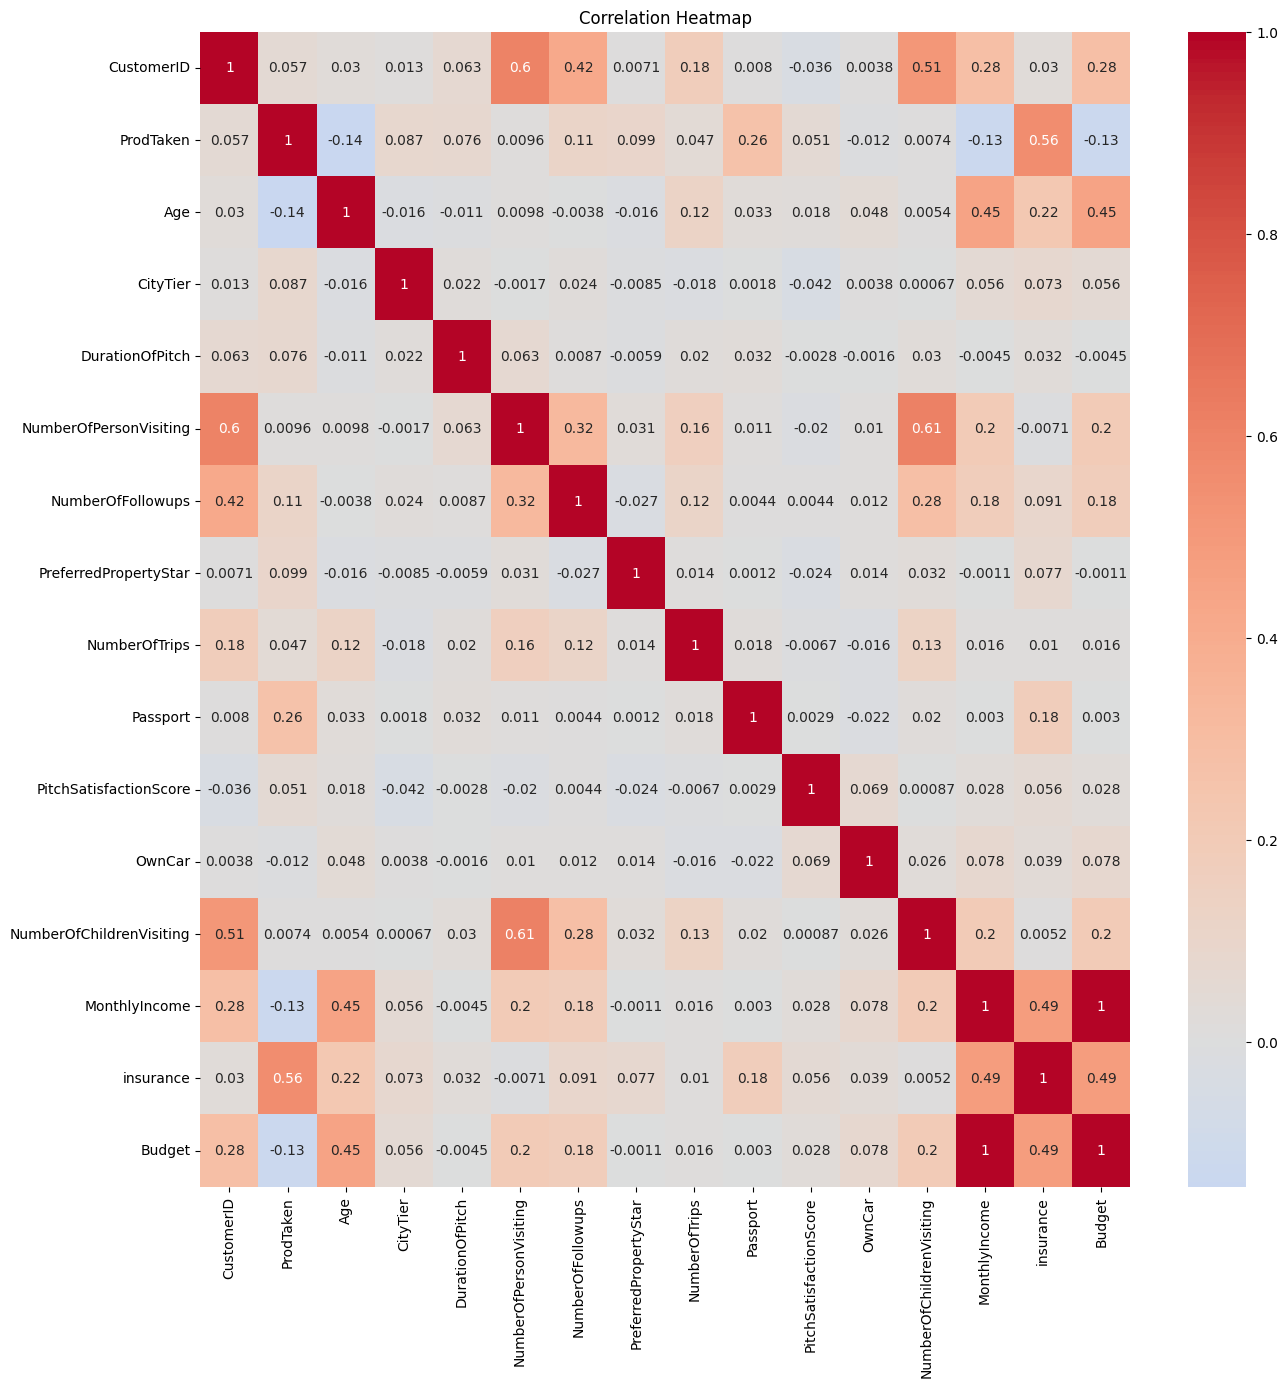

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

**INSIGHTS**:
* Highly - Positively Correlated :
        NumberOfPeople and NumberOfChildrenVisiting
* Highly - Negatively Correlated :
        Age and Prodtaken
      

## Histogram

### Age vs NumberOfTrips

In [ ]:
# df_plt1.set_index('Age').head(50).plot(kind='bar',figsize=(10,20))
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df,x='Age',y='NumberOfTrips')
# fig.add_traces(px.scatter(df_plt2))
fig.show()

##Pie Chart

### Designation - Pie chart

In [ ]:
# Count the number of employees in each designation
designation_counts = df['Designation'].value_counts().reset_index()
designation_counts.columns = ['Designation', 'Count']
designation_counts

,Designation,Count
0,Executive,1842
1,Manager,1732
2,Senior Manager,742
3,AVP,342
4,VP,230


In [ ]:
# Create a pie chart using Plotly
fig = px.pie(designation_counts, values='Count', names='Designation', title='Distribution of Designations')

# Show the pie chart
fig.show()

## Violin Plot

###NumberOfFollowups vs DurationOfPitch

In [ ]:
fig = px.violin(df,y="DurationOfPitch",x="NumberOfFollowups")
fig.show()

### Age Distribution

In [ ]:
fig = px.violin(df,x="Age")
fig.show()

###Designation Distribution

In [ ]:
fig = px.violin(df,x='Designation')
fig.show()

## Density Plot

### Distribution of Number Of Trips

<Axes: xlabel='NumberOfTrips', ylabel='Density'>

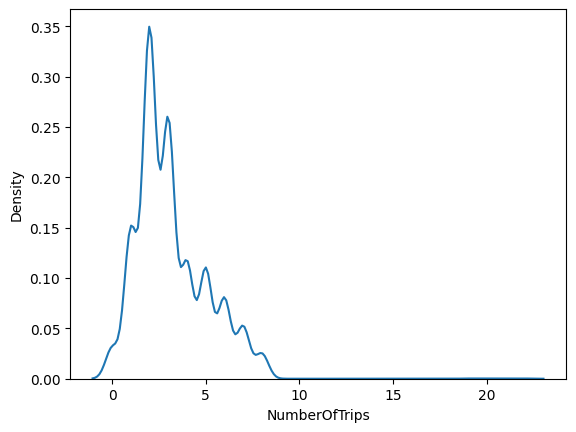

In [ ]:
import seaborn as sns

sns.kdeplot(df['NumberOfTrips'])

## Box Plots

### Number Of trips

In [ ]:
fig = px.box(df,x='NumberOfTrips')
fig.show()

### Number Of Person Visiting

In [ ]:
fig = px.box(df,x='NumberOfPersonVisiting')
fig.show()

### NumberOfChildrenVisiting

In [ ]:
fig = px.box(df,x='NumberOfChildrenVisiting')
fig.show()

 INSIGHTS : it suggests that the lower 25% of the data points are tightly grouped, and the median is located within this group.
 indicating that the lower part of the data set is relatively concentrated or has less variation

### CityTier vs MonthlyIncome

In [ ]:
fig = px.box(df,x='CityTier',y="MonthlyIncome")
fig.show()

### ProductPitched vs DurationOfPitch

In [ ]:
fig = px.box(df,x='ProductPitched',y="DurationOfPitch")
fig.show()

## Bar Plot

### Age vs Product Pitched

#### Age Distribution when the Product is Basic

In [ ]:
df_basic = df[df['ProductPitched']=='Basic']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Basic)')
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

#### Age Distribution when the Product is Deluxe

In [ ]:
df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [ ]:
df_basic = df[df['ProductPitched']=='Deluxe']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Deluxe)')
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

#### Age Distribution when the Product is Standard

In [ ]:
df_basic = df[df['ProductPitched']=='Standard']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Standard)')
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

#### Age Distribution when the Product is Super Deluxe


In [ ]:
df_basic = df[df['ProductPitched']=='Super Deluxe']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Super Deluxe)')
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

#### Age Distribution when the Product is King


In [ ]:
df_basic = df[df['ProductPitched']=='King']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (King)')
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

## Scatter Plot

### NumberOfPersonVisiting vs NumberOfChildrenVisiting

In [ ]:
fig = px.scatter(df,x='NumberOfPersonVisiting',y='NumberOfChildrenVisiting',trendline='ols')
fig.show()

### MonthlyIncome vs ProdTaken

In [ ]:
fig = px.scatter(df,x='MonthlyIncome',y='ProdTaken',trendline='ols')
fig.show()

# **Exploratory Data Analysis**

## Label Encoding

In [ ]:
#label encoding on designation
label = LabelEncoder()
df['Designation'] = label.fit_transform(df['Designation'])

#print which encoding given to which column
df['Designation'].unique()

array([1, 2, 4, 3, 0])

Label Encoding

 0 = Avp, 1 = executive, 2 = manager, 3 = Senior maneger, 4 = VP

In [ ]:

df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited'], dtype=object)

In [ ]:
# lebel encoding on type of contact
label = LabelEncoder()
df['TypeofContact'] = label.fit_transform(df['TypeofContact'])
df


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,Basic,...,2.0,1,3,1,1.000000,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,Basic,...,3.0,1,4,0,1.000000,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,Basic,...,3.0,0,2,1,1.000000,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,Basic,...,2.0,1,2,1,1.000000,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,Basic,...,3.0,0,4,0,1.000000,1,20629.0,0,1,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,Super Deluxe,...,2.0,1,5,1,2.000000,0,32436.0,1,0,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,Super Deluxe,...,2.0,0,3,1,1.000000,0,31890.0,1,0,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,Super Deluxe,...,6.0,1,1,0,1.000000,0,31643.0,1,0,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,Super Deluxe,...,4.0,0,5,1,1.187267,0,35233.0,1,1,10569.9


In [ ]:
df['TypeofContact'].unique()

array([1, 0])



*   0 = company invited
*   1 = self-invited



In [ ]:
df['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [ ]:

#label encoding on ProductPitched
label = LabelEncoder()
df['ProductPitched'] = label.fit_transform(df['ProductPitched'])
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,0,...,2.0,1,3,1,1.000000,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,0,...,3.0,1,4,0,1.000000,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,0,...,3.0,0,2,1,1.000000,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,0,...,2.0,1,2,1,1.000000,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,0,...,3.0,0,4,0,1.000000,1,20629.0,0,1,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,4,...,2.0,1,5,1,2.000000,0,32436.0,1,0,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,4,...,2.0,0,3,1,1.000000,0,31890.0,1,0,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,4,...,6.0,1,1,0,1.000000,0,31643.0,1,0,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,4,...,4.0,0,5,1,1.187267,0,35233.0,1,1,10569.9


In [ ]:
df['ProductPitched'].unique()

array([0, 1, 2, 3, 4])



*   0 = basic
*   1 = deluxe


*   2 = king

*   3 = standard, 4 = super deluxe


*    4 = super deluxe










In [ ]:
df['Occupation'].unique()


array(['Salaried', 'Small Business', 'Large Business', 'Free Lancer'],
      dtype=object)

In [ ]:
label = LabelEncoder()
df['Occupation'] = label.fit_transform(df['Occupation'])
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,2,Male,3,3.0,0,...,2.0,1,3,1,1.0,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,3,Male,3,5.0,0,...,3.0,1,4,0,1.0,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,3,Female,4,4.0,0,...,3.0,0,2,1,1.0,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,2,Female,3,5.0,0,...,2.0,1,2,1,1.0,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,2,Male,4,4.0,0,...,3.0,0,4,0,1.0,1,20629.0,0,1,6188.7


In [ ]:
df['Occupation'].unique()

array([2, 3, 1, 0])

Label Encoding Occupation.

*   0 = free lancer
*   1 = large business

*   2 = salaried
*   3 = small business





In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df.head()


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,2,1,3,3.0,0,...,2.0,1,3,1,1.0,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,3,1,3,5.0,0,...,3.0,1,4,0,1.0,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,3,0,4,4.0,0,...,3.0,0,2,1,1.0,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,2,0,3,5.0,0,...,2.0,1,2,1,1.0,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,2,1,4,4.0,0,...,3.0,0,4,0,1.0,1,20629.0,0,1,6188.7


In [ ]:
df['Gender'].unique()

array([1, 0])


Label Encoding for  **Gender**
*    0 = Female
*    1 = Male



## Visualization After Label Encoding

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance',
       'TypeofContact', 'Budget'],
      dtype='object')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

The count plot for ProdTaken will show the distribution of purchased (1) and not purchased (0) travel packages.

In [ ]:
# Count plot for ProdTaken
purchase_count = df['ProdTaken'].value_counts()
fig = px.bar(x=purchase_count.index, y=purchase_count.values, labels={'x': 'Travel Package Purchase', 'y': 'Count'})
fig.update_layout(title='Count of Travel Package Purchases')
fig.show()

The histogram for Age gives an overview of the age distribution of customers.

In [ ]:
# Histogram for Age
fig = px.histogram(df, x='Age', nbins=20, title='Age Distribution')
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Count')
fig.show()

The box plot of Age by CityTier allows you to see if age varies across different city tiers.

In [ ]:
# Box plot of Age by CityTier
fig = px.box(df, x='CityTier', y='Age', title='Age Distribution by City Tier')
fig.update_xaxes(title='City Tier')
fig.update_yaxes(title='Age')
fig.show()

In [ ]:
# Pair plot for selected numerical features
selected_features = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PitchSatisfactionScore', 'MonthlyIncome']
fig = px.scatter_matrix(df[selected_features], title='Pairplot of Selected Numerical Features')
fig.show()

The pairplot shows relationships between selected numerical features, which can help identify patterns or correlations.

2.0

In [ ]:
# Age distribution by ProductPitched
fig_age_product = px.box(df, x='ProductPitched', y='Age',
                         title='Age Distribution by Product Pitched')
fig_age_product.show()

Age Distribution by Product Pitched:

Understanding the age distribution for each product pitched can help tailor products to different age groups.

In [ ]:
# Age distribution by PreferredPropertyStar
fig_age_star = px.box(df, x='PreferredPropertyStar', y='Age',
                      title='Age Distribution by Preferred Star Rating')
fig_age_star.show()

Age Distribution by Preferred Star Rating:

This plot allows us to see if there are age preferences for specific star ratings in preferred properties.

In [ ]:
# Duration of pitch distribution by ProductPitched
fig_duration_product = px.box(df, x='ProductPitched', y='DurationOfPitch',
                              title='Duration of Pitch by Product Pitched')
fig_duration_product.show()

Duration of Pitch by Product Pitched:

You can explore if the duration of the sales pitch varies for different products, which may influence purchase decisions.

In [ ]:
# Age distribution by Occupation
fig_age_occupation = px.box(df, x='Occupation', y='Age',
                            title='Age Distribution by Occupation')
fig_age_occupation.show()

Age Distribution by Occupation:

Exploring the age distribution based on occupation can provide insights into the types of customers and their age preferences.

# SAHIL EDA

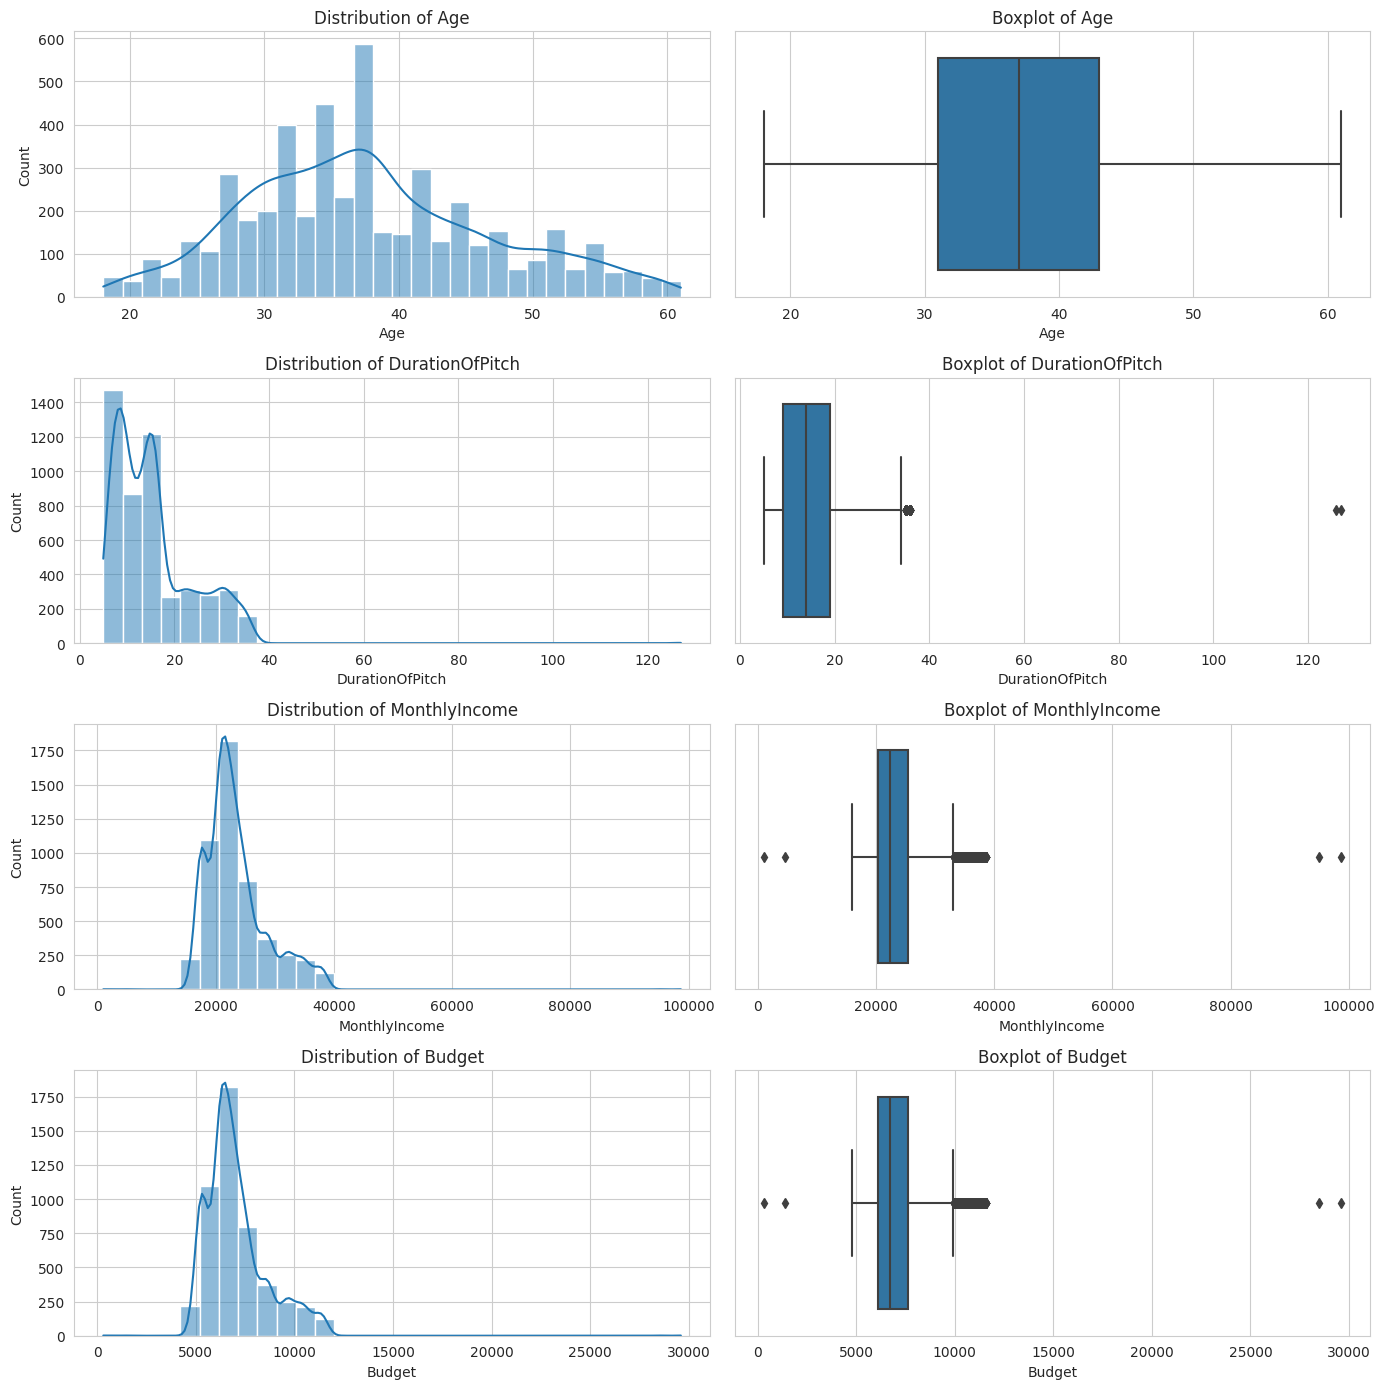

In [ ]:
# Importing necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetic theme for plots
sns.set_style("whitegrid")

# Defining the list of numerical columns to visualize
numerical_cols = ['Age', 'DurationOfPitch', 'MonthlyIncome', 'Budget']

# Plotting histograms and boxplots for the selected numerical columns
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(14, 14))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i, 0], kde=True, bins=30)
    axes[i, 0].set_title(f'Distribution of {col}')
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


#Age:

The distribution seems slightly right-skewed, indicating a higher concentration of younger customers.
There are a few outliers on the higher age side.
#DurationOfPitch:

The distribution appears to be slightly left-skewed, indicating that most pitches are of shorter duration.
There are outliers on both the lower and higher ends, suggesting some extremely short and long pitches.
#MonthlyIncome:

The distribution is right-skewed, which means most customers have a lower monthly income, with a few having exceptionally high incomes.
Outliers are visible on the higher income side.
#Budget:

The distribution seems multi-modal, suggesting multiple peaks or groups within the data.
Outliers are present on both the lower and higher ends.
From the above visualizations, we gain insights into the distribution and characteristics of each variable, which can be useful for subsequent modeling and analysis.

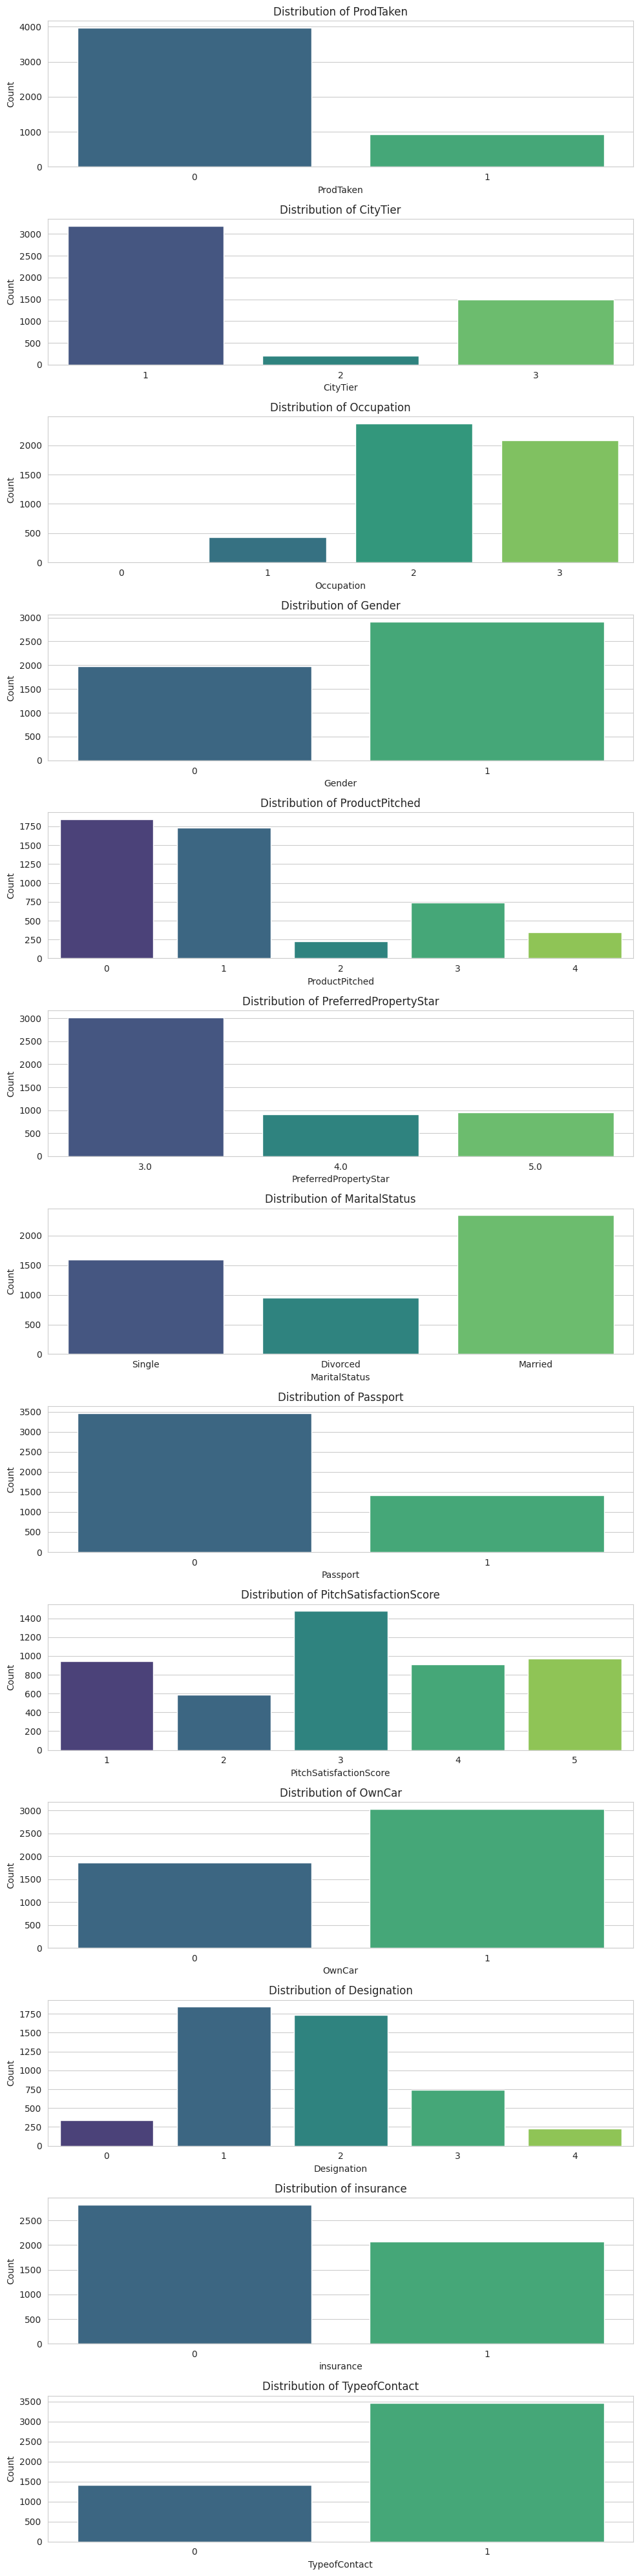

In [ ]:
# Defining the list of categorical columns to visualize
categorical_cols = ['ProdTaken', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
                    'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
                    'OwnCar', 'Designation', 'insurance', 'TypeofContact']

# Plotting bar charts for the selected categorical columns
fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(10, 40))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


1. ProdTaken: Majority of customers haven't taken the product.
2. CityTier: Most customers belong to CityTier 1, with fewer from CityTier 3 and 2.
3. Occupation: A significant number of customers are labeled as '1', with fewer in the other categories.
4. Gender: The dataset contains more male customers than female.
5. ProductPitched: Most customers were pitched product '2', followed by '3', '1', and '4'.
6. PreferredPropertyStar: Most customers prefer properties labeled '3', '4', and '5', with '5' being the least preferred.
7. MaritalStatus: Majority of customers are labeled as '1'.
8. Passport: A larger number of customers do not have a passport compared to those who do.
9. PitchSatisfactionScore: The satisfaction score seems fairly distributed across different scores.
10. OwnCar: The majority of customers don't own a car.
11. Designation: Most customers have the designation labeled as '2'.
12. Insurance: The majority of customers are labeled as '1'.
13. TypeofContact: The majority of customers were contacted via 'Company Invited'.

These visualizations provide insights into the categorical variables' distributions. This helps in understanding the balance between categories and can be useful for subsequent modeling and analysis.

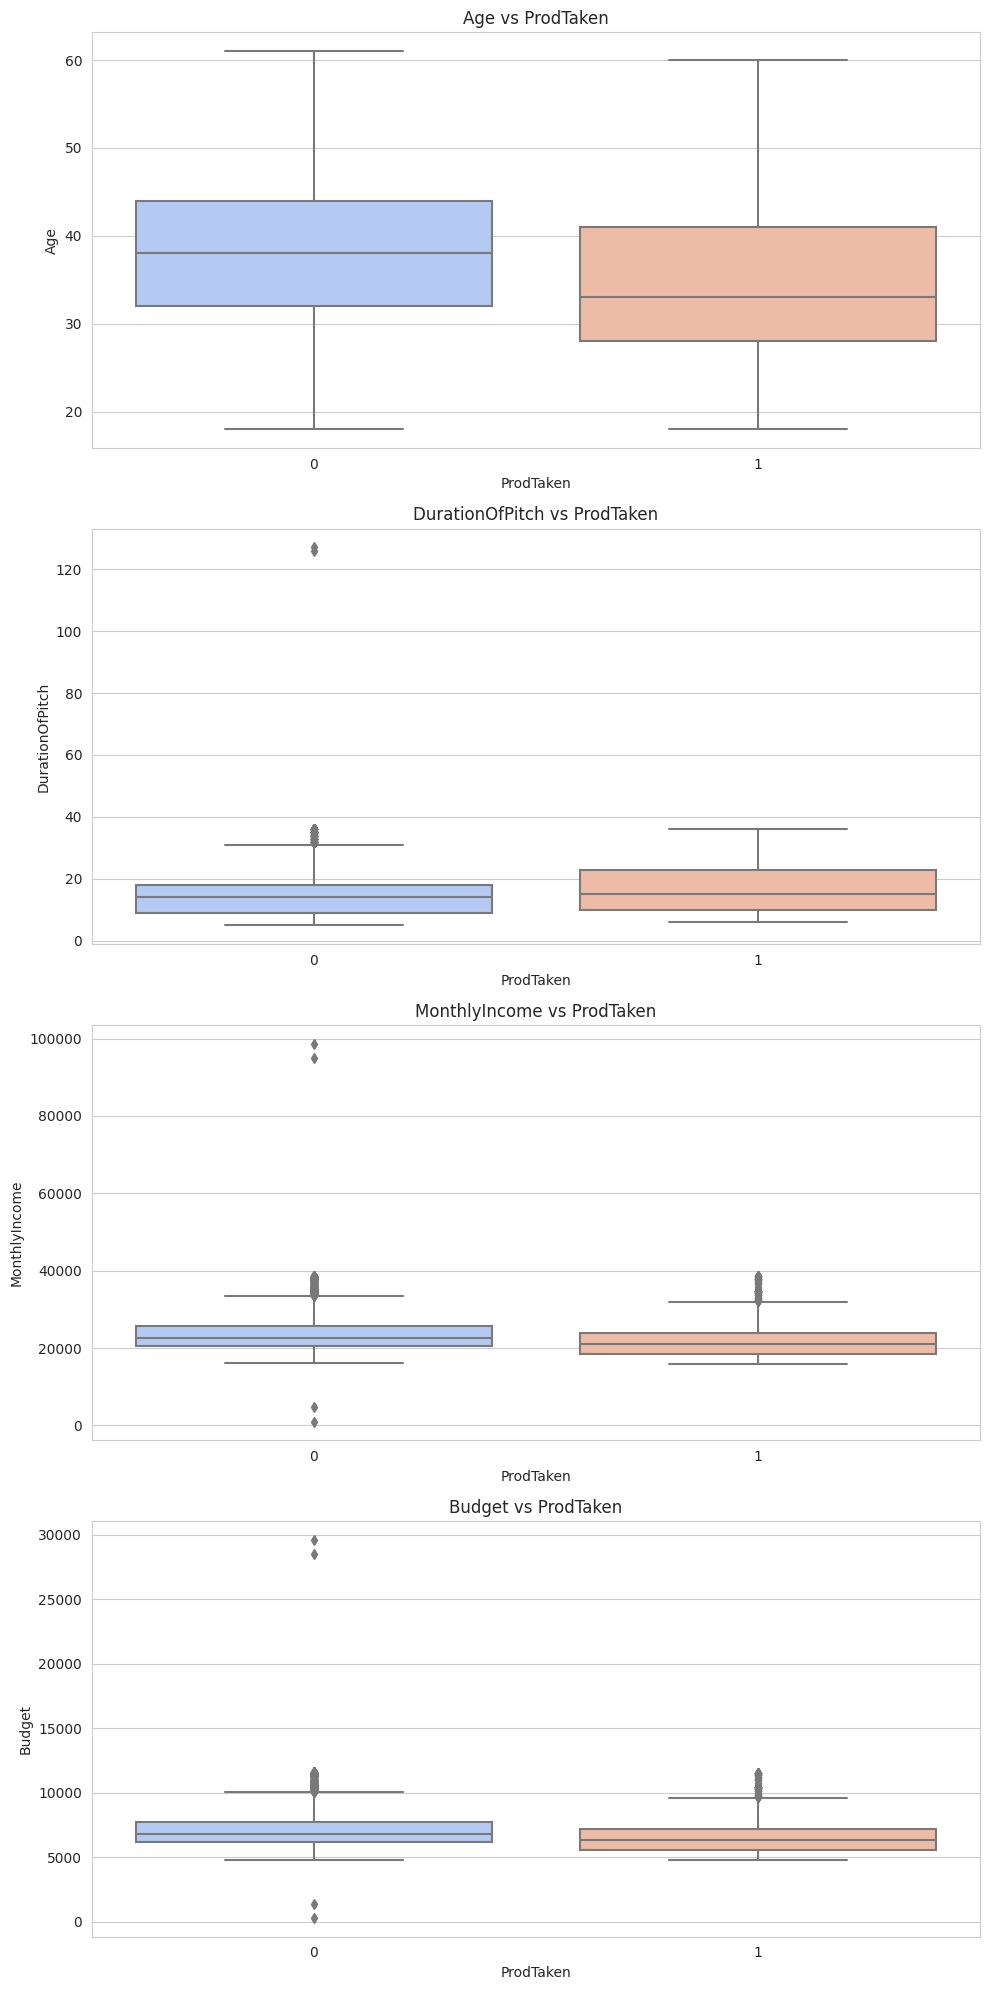

In [ ]:
# Plotting box plots for selected numerical columns against the target variable 'ProdTaken'
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='ProdTaken', y=col, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'{col} vs ProdTaken')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('ProdTaken')

plt.tight_layout()
plt.show()


Here's the bivariate analysis of selected numerical variables against the target variable 'ProdTaken':

1. Age vs. ProdTaken:

Customers who took the product seem to have a slightly higher median age compared to those who didn't.
There are outliers in both groups, especially in the "not taken" group.
2. DurationOfPitch vs. ProdTaken:

The median duration of the pitch is slightly higher for customers who did not take the product.
This might suggest that longer pitches do not necessarily result in a sale.
3. MonthlyIncome vs. ProdTaken:

The income distribution seems similar for both groups.
Some higher income outliers are more evident in the "taken" group.
4. Budget vs. ProdTaken:

The median budget for customers who took the product is slightly higher.

Both groups have outliers, especially on the higher end.
From this analysis, we see some differences in the distribution of numerical variables based on whether a customer took the product or not. These differences can provide valuable insights for modeling.

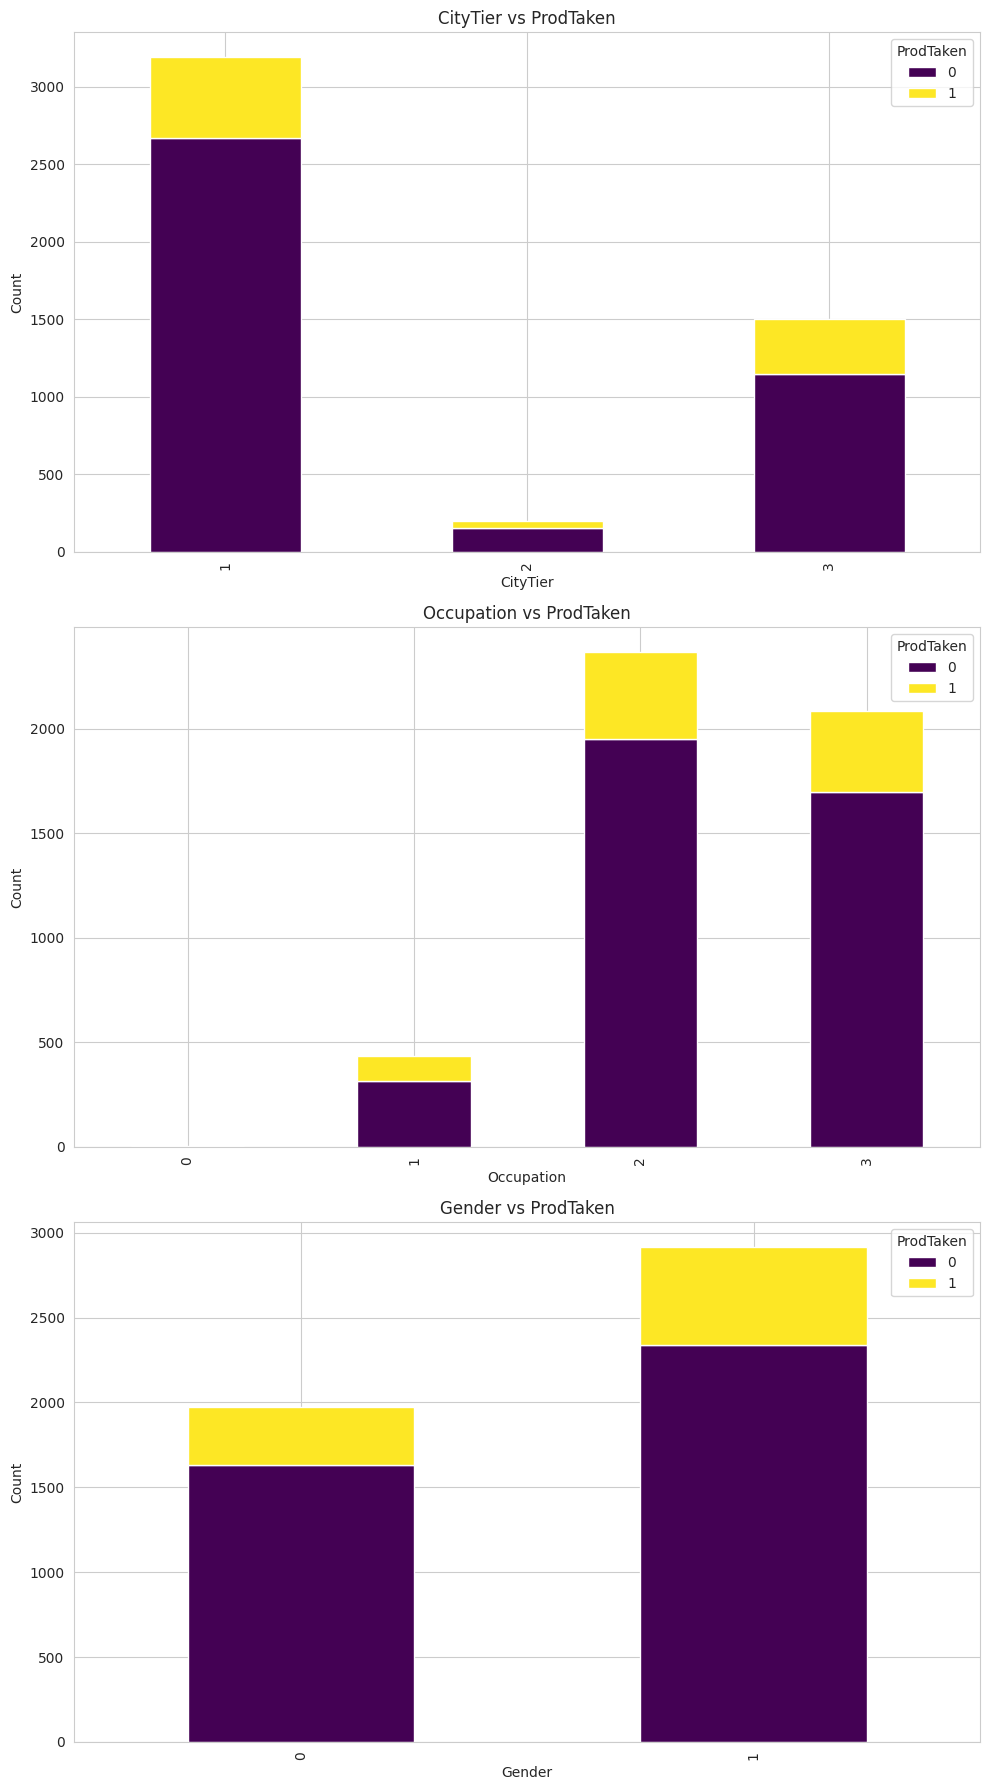

In [ ]:
# Plotting stacked bar charts for selected categorical columns against the target variable 'ProdTaken'
selected_categorical_cols = ['CityTier', 'Occupation', 'Gender']

fig, axes = plt.subplots(nrows=len(selected_categorical_cols), figsize=(10, 18))

for i, col in enumerate(selected_categorical_cols):
    df_grouped = df.groupby([col, 'ProdTaken']).size().unstack()
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap="viridis")
    axes[i].set_title(f'{col} vs ProdTaken')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].legend(title='ProdTaken')

plt.tight_layout()
plt.show()


Here's the bivariate analysis of selected categorical variables against the target variable 'ProdTaken':

1. CityTier vs. ProdTaken:

For all city tiers, the number of customers who did not take the product is higher than those who did.
CityTier 1 has the highest number of customers, followed by CityTier 3 and 2.
2. Occupation vs. ProdTaken:

Similar to CityTier, for all occupation types, the number of customers who did not take the product is higher.
Occupation '1' has the most customers, and it appears to be the dominant category.
3. Gender vs. ProdTaken:

Males have a higher count in both the "taken" and "not taken" groups compared to females.
For both genders, more customers did not take the product compared to those who did.
From these visualizations, we can infer the distribution of categories and their relation to the target variable. The patterns observed can provide insights into customer behavior and preferences and help in tailoring strategies or models accordingly.

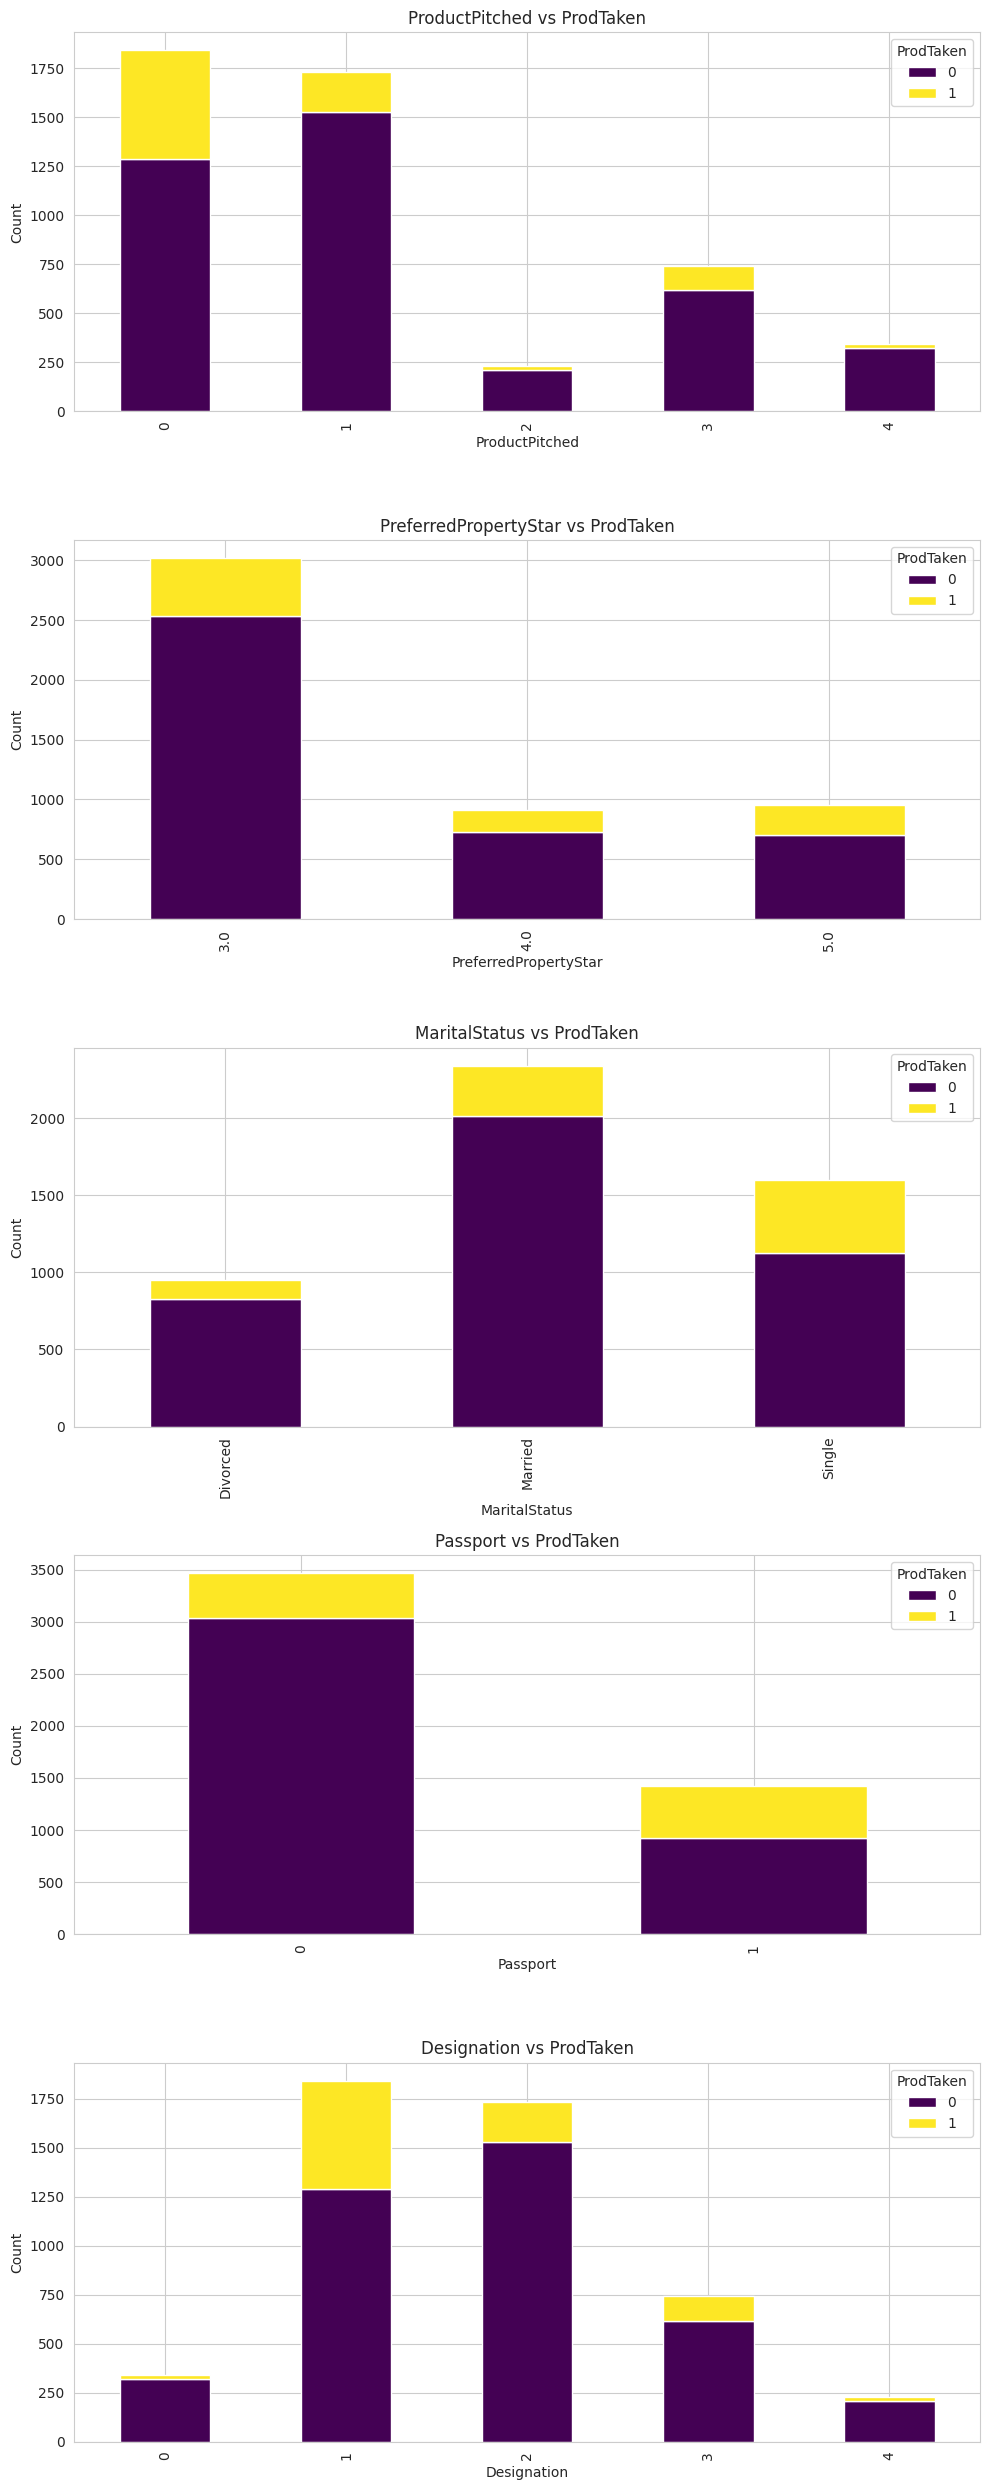

In [ ]:
# Plotting stacked bar charts for more categorical columns against the target variable 'ProdTaken'
more_categorical_cols = ['ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'Designation']

fig, axes = plt.subplots(nrows=len(more_categorical_cols), figsize=(10, 25))

for i, col in enumerate(more_categorical_cols):
    df_grouped = df.groupby([col, 'ProdTaken']).size().unstack()
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap="viridis")
    axes[i].set_title(f'{col} vs ProdTaken')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].legend(title='ProdTaken')

plt.tight_layout()
plt.show()


1. ProductPitched vs. ProdTaken:

Product '2' seems to be the most pitched, followed by '3', '1', and '4'.
For all pitched products, more customers did not take the product compared to those who did.
2. PreferredPropertyStar vs. ProdTaken:

Most customers prefer properties labeled '3', followed closely by '4' and '5'.
For all property star preferences, the number of customers who did not take the product is higher.
3. MaritalStatus vs. ProdTaken:

The majority of customers fall into the '1' category for marital status.
Similar to other variables, more customers did not take the product in both marital status categories.
4. Passport vs. ProdTaken:

A large number of customers do not have a passport.
Among those who do and don't have a passport, more customers did not take the product.
5. Designation vs. ProdTaken:

Most customers have the designation labeled as '2', followed by '1' and '3'.
For all designations, more customers did not take the product.

## From these visualizations, we continue to observe patterns in how various categorical features relate to the target variable. Understanding these relationships is crucial for feature engineering and modeling later on.

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detecting outliers for numerical columns
outliers_data = {}
for col in numerical_cols:
    outliers_data[col] = detect_outliers_iqr(df, col).shape[0]

outliers_data


{'Age': 0, 'DurationOfPitch': 112, 'MonthlyIncome': 357, 'Budget': 357}

- Age: No outliers.
- DurationOfPitch: 112 outliers.
- MonthlyIncome: 357 outliers.
- Budget: 357 outliers.

It's important to note that just because a data point is identified as an outlier doesn't necessarily mean it's an error or should be removed.